In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler


In [21]:
data=pd.read_csv('first inten project.csv')

In [22]:
data.shape

(36285, 17)

In [23]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [24]:
for col in data.columns:
    # Check for whitespace, empty values, and data type
    if data[col].dtype == 'object': # Check if the column is of type object (string)
        has_whitespace = data[col].str.contains(r'^\s+|\s+$').any()
    else:
        has_whitespace = False
    has_empty_values = data[col].isnull().any()
    data_type = data[col].dtype

    # Print results
    if has_whitespace or has_empty_values:
        print(f"Column '{col}':")
        if has_whitespace:
              print("  - Contains leading or trailing whitespace")
        if has_empty_values:
            print("  - Contains empty values")
        print("  - Data type:", data_type)

In [25]:
for col in data.columns:
    if data[col].dtype == 'object': # Check if the column is of object type
        data[col] = data[col].str.strip()  # Apply strip only if it's a string column

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [27]:
data.isnull().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


In [28]:
data['repeated']=data['repeated'].fillna(data['repeated'].mean())
data['P-C']=data['P-C'].fillna(data['P-C'].mean())
data['P-not-C']=data['P-not-C'].fillna(data['P-not-C'].mean())
data['booking status']=data['booking status'].fillna(data['booking status'].mode())

In [29]:
outlier_features =  data.drop(['type of meal','room type','market segment type','booking status','Booking_ID','date of reservation'],axis = 1)


In [30]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame
Q1 = outlier_features.quantile(0.25)
Q3 = outlier_features.quantile(0.75)
IQR = Q3 - Q1

# Using IQR to detect outliers
outliers_iqr = data[(outlier_features < Q1 - 1.5 * IQR) | (outlier_features > Q3 + 1.5 * IQR)]

# Using Z-score to detect outliers
mean = outlier_features.mean()
std = outlier_features.std()
z_scores = (outlier_features- mean) / std
threshold = 3
outliers_zscore = data[abs(z_scores) > threshold]

# Handling outliers (e.g., removing)
data_cleaned = data[~data.index.isin(outliers_iqr.index)]  # Remove outliers detected by IQR

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

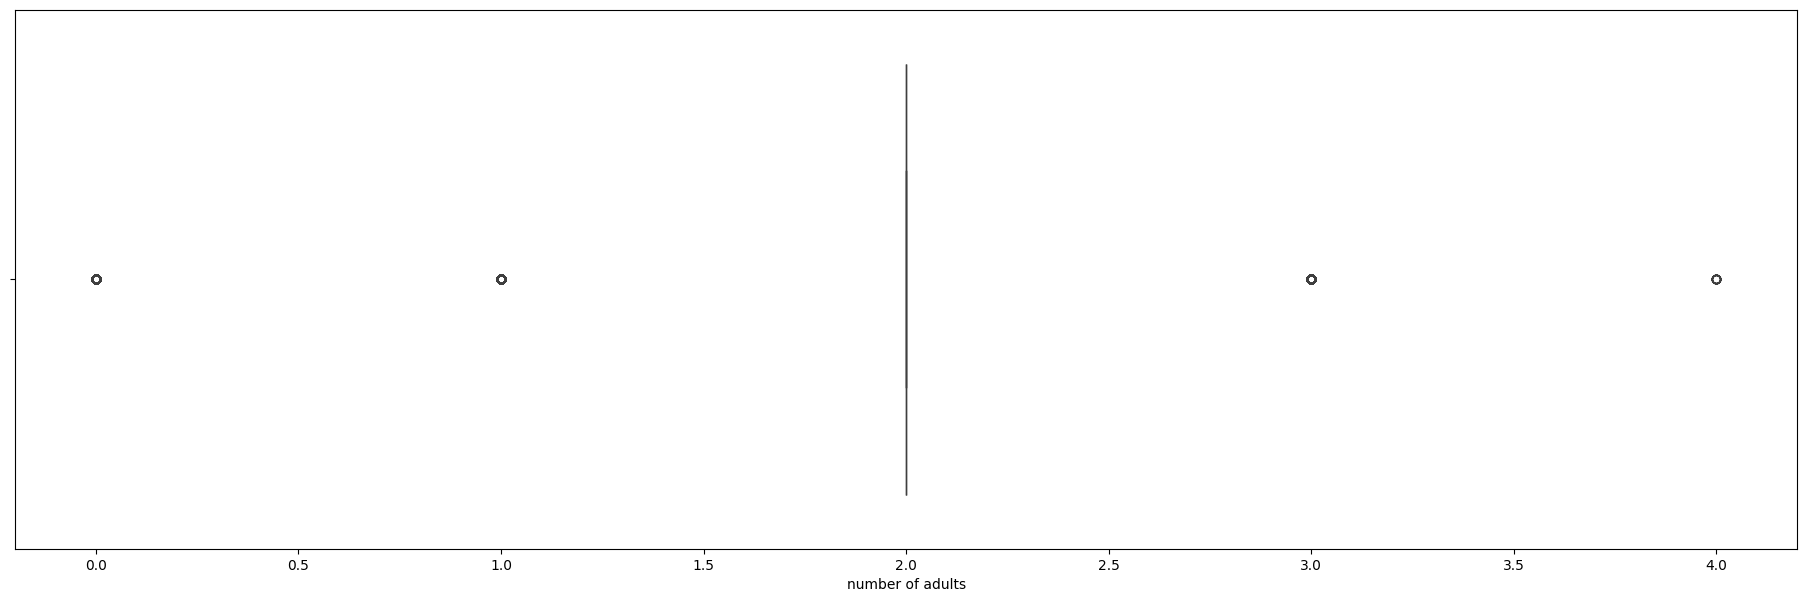

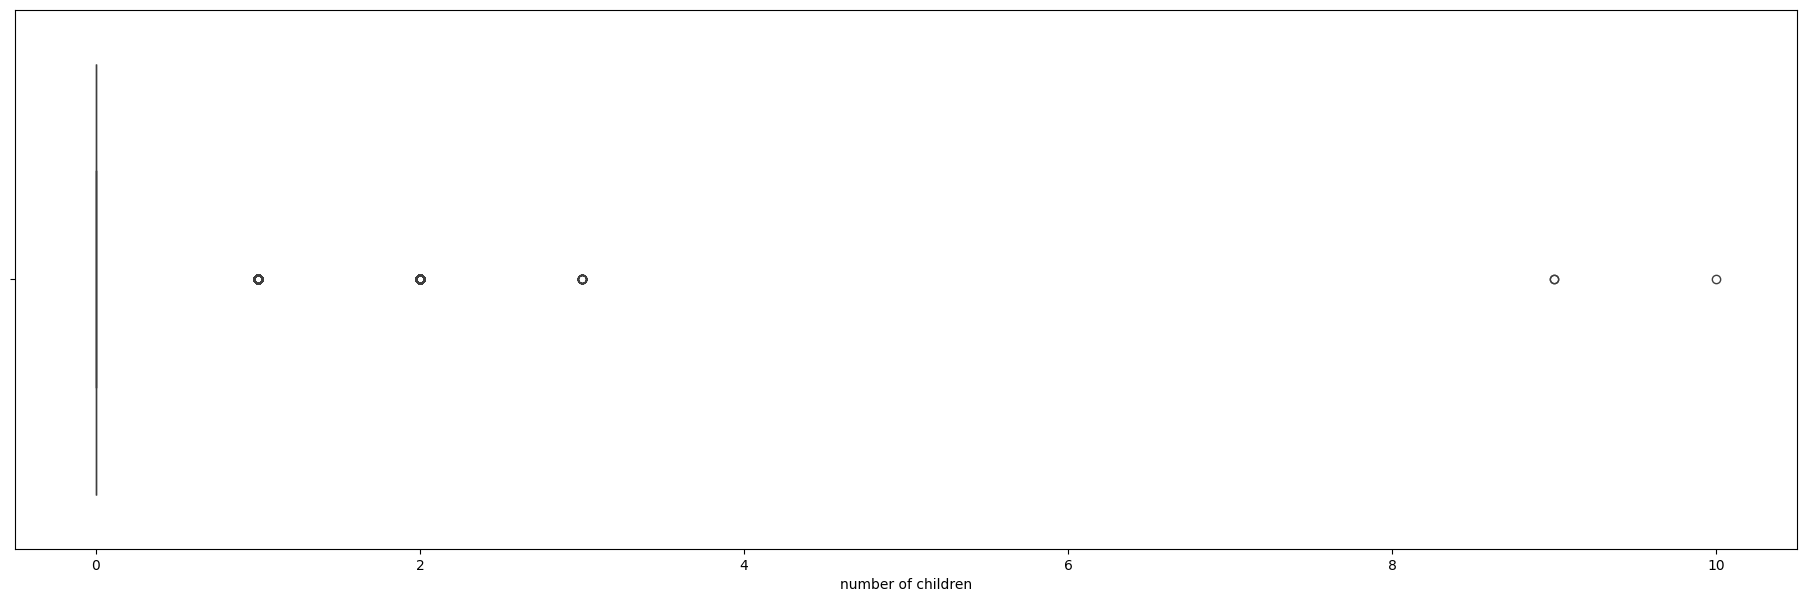

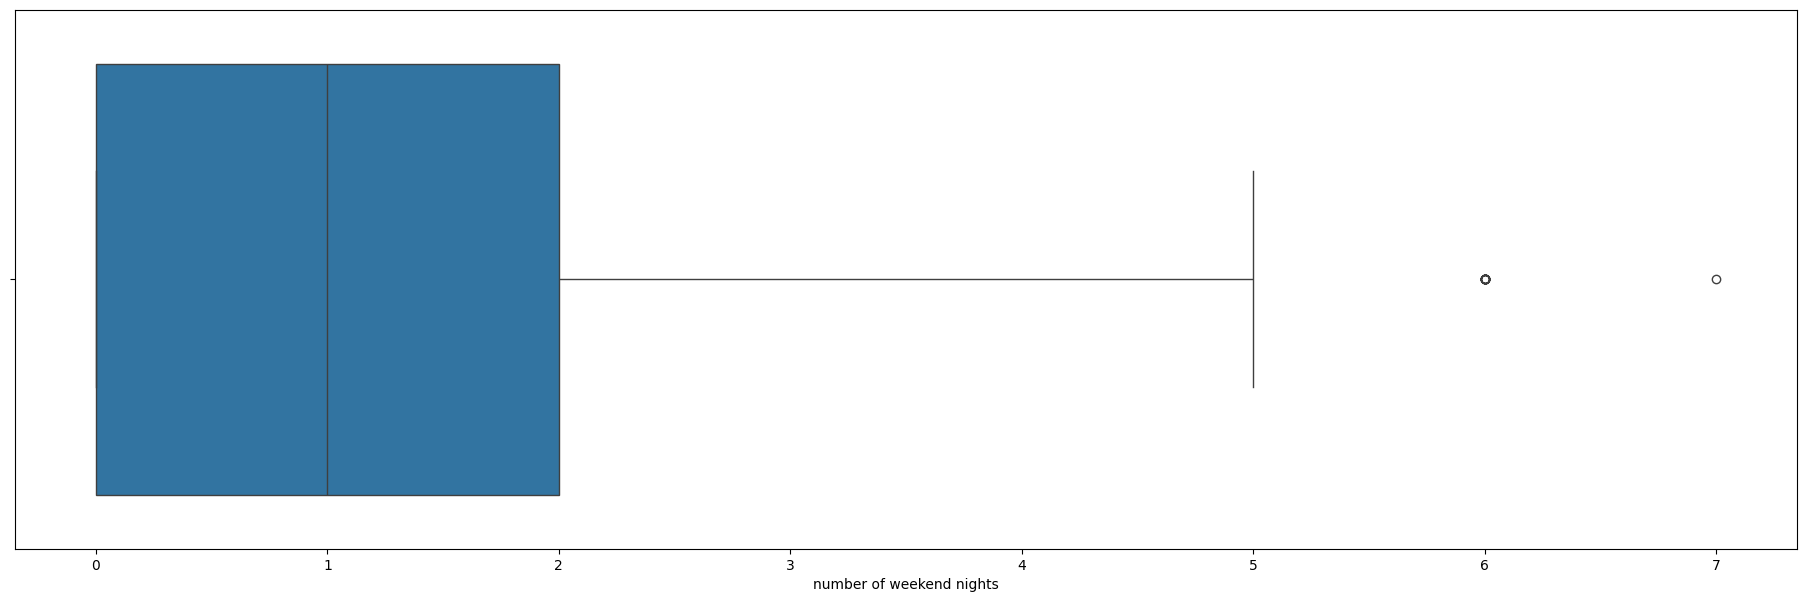

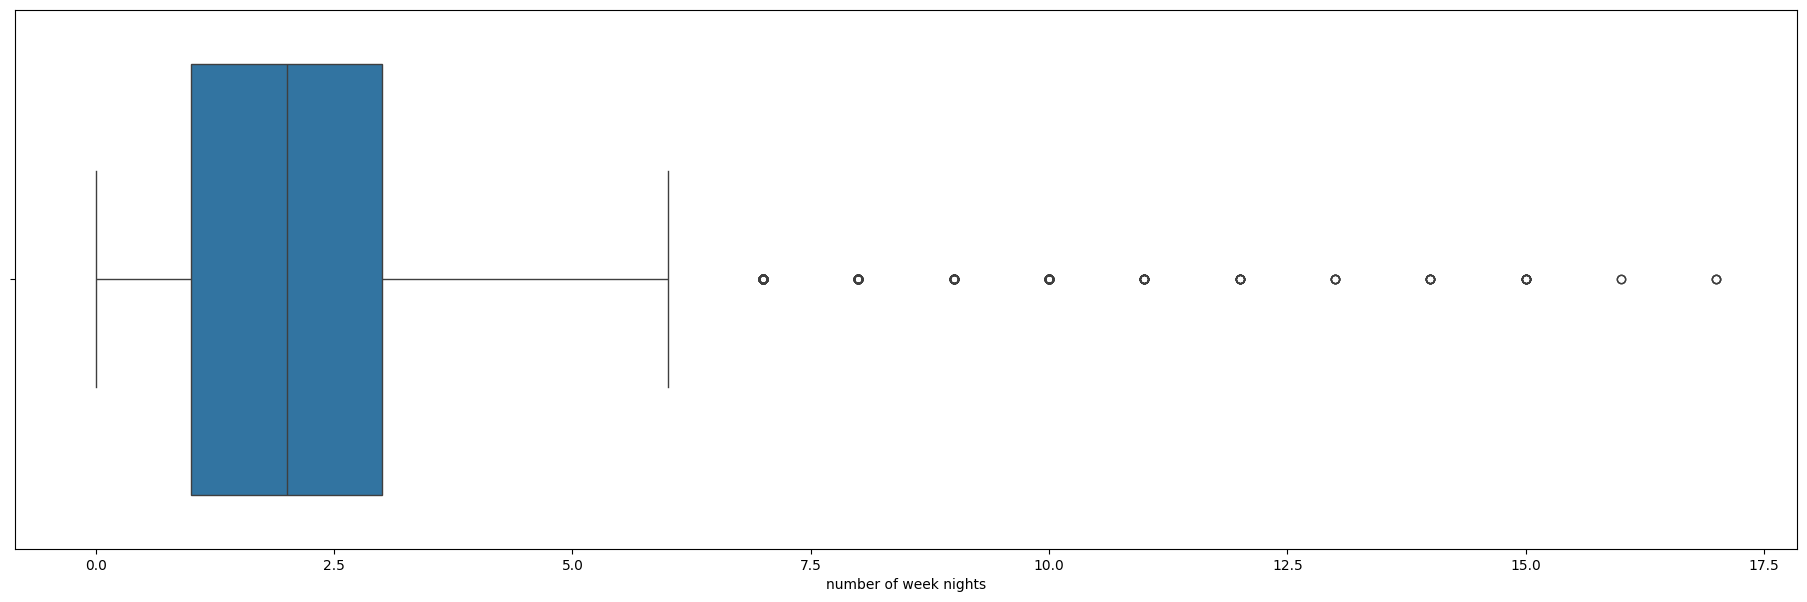

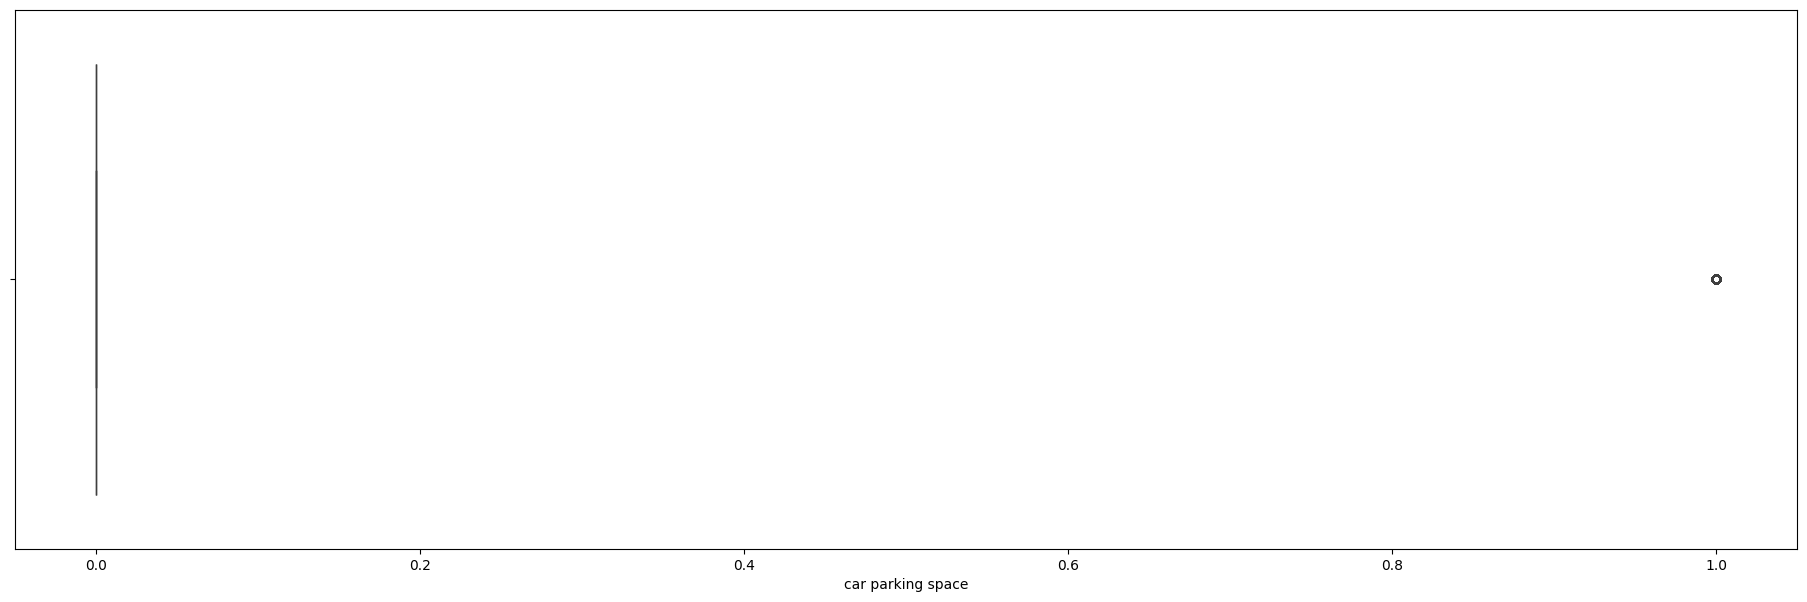

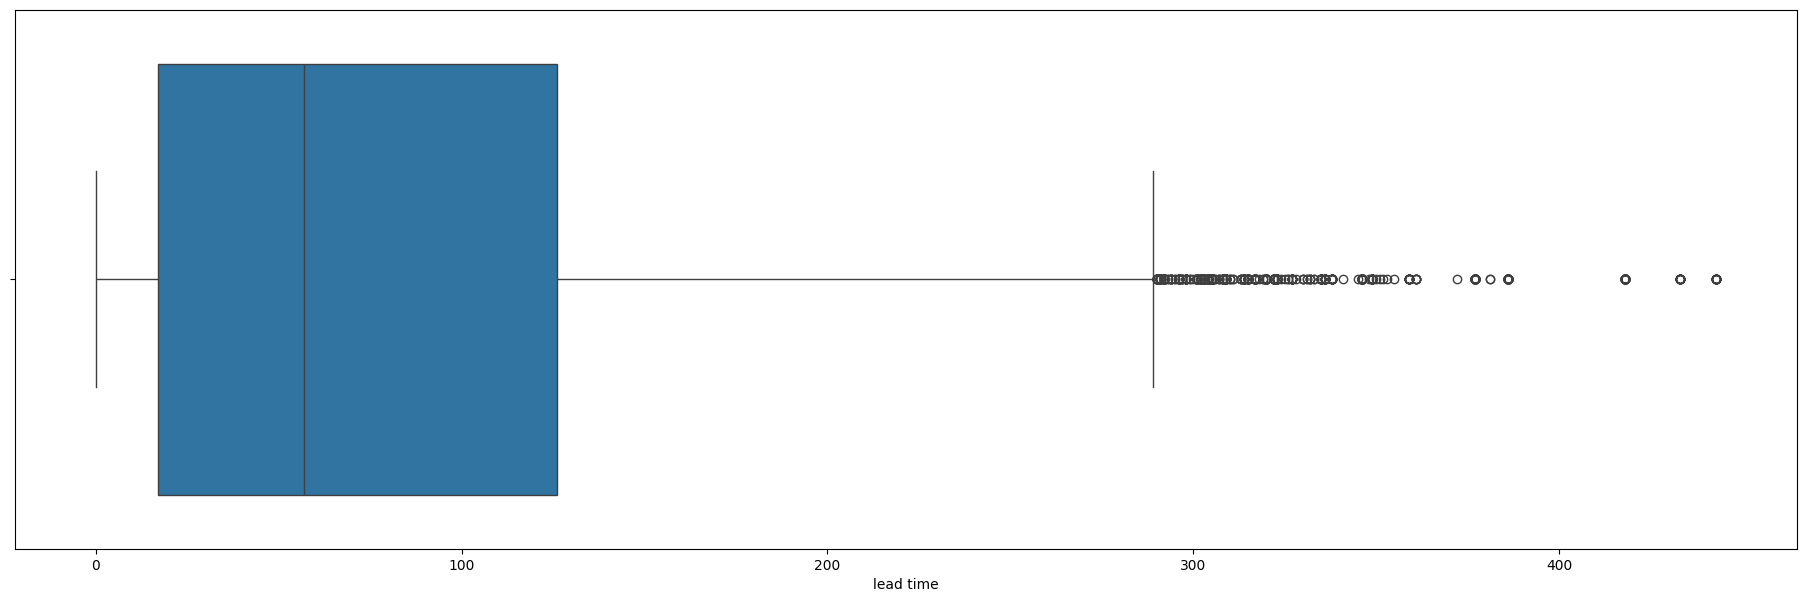

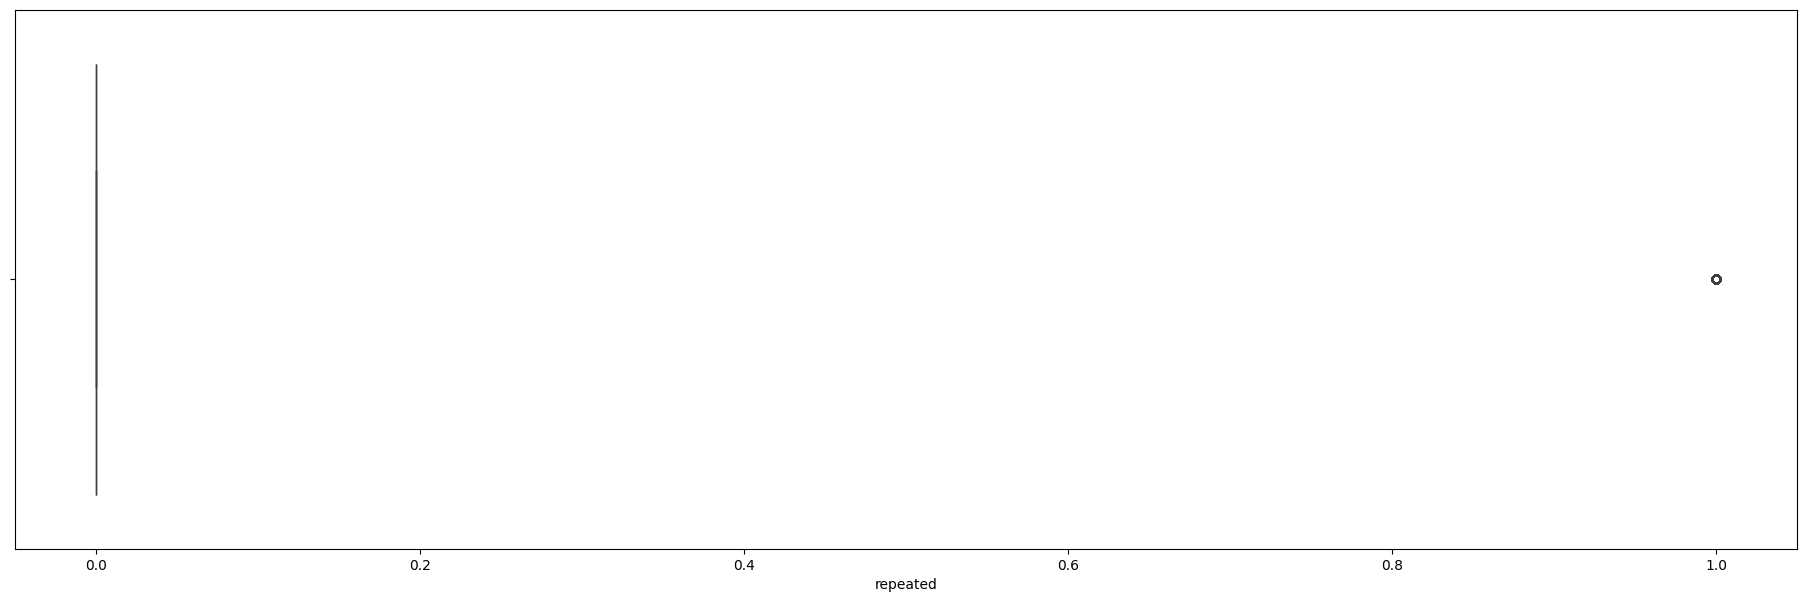

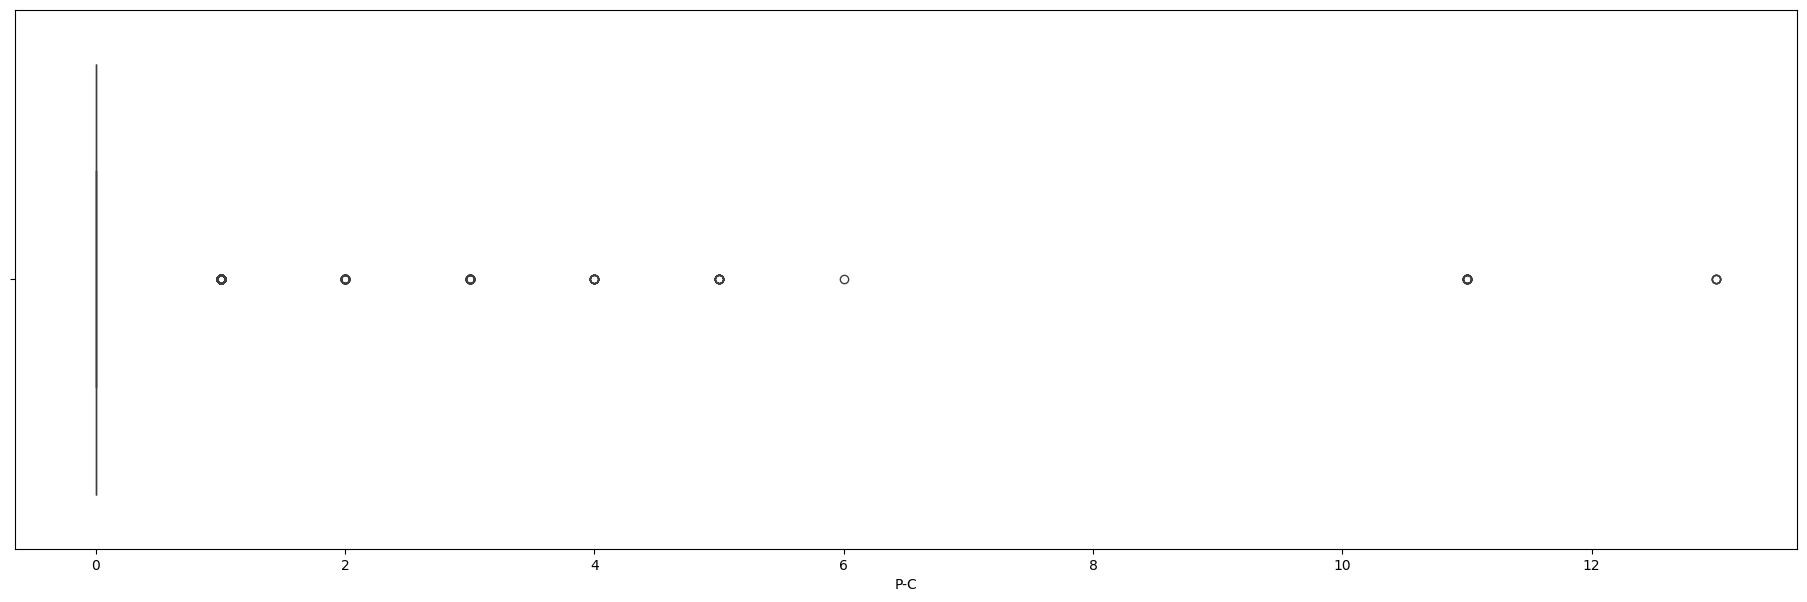

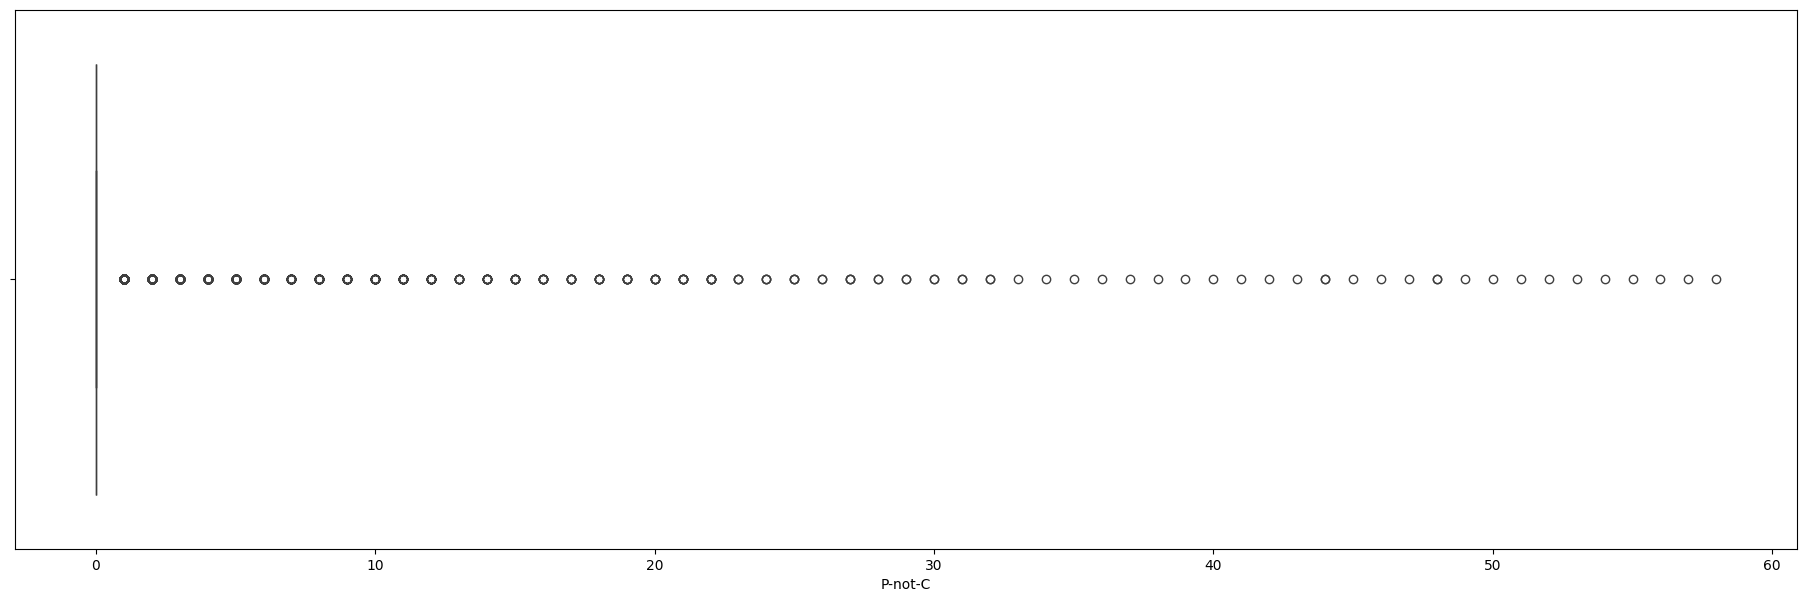

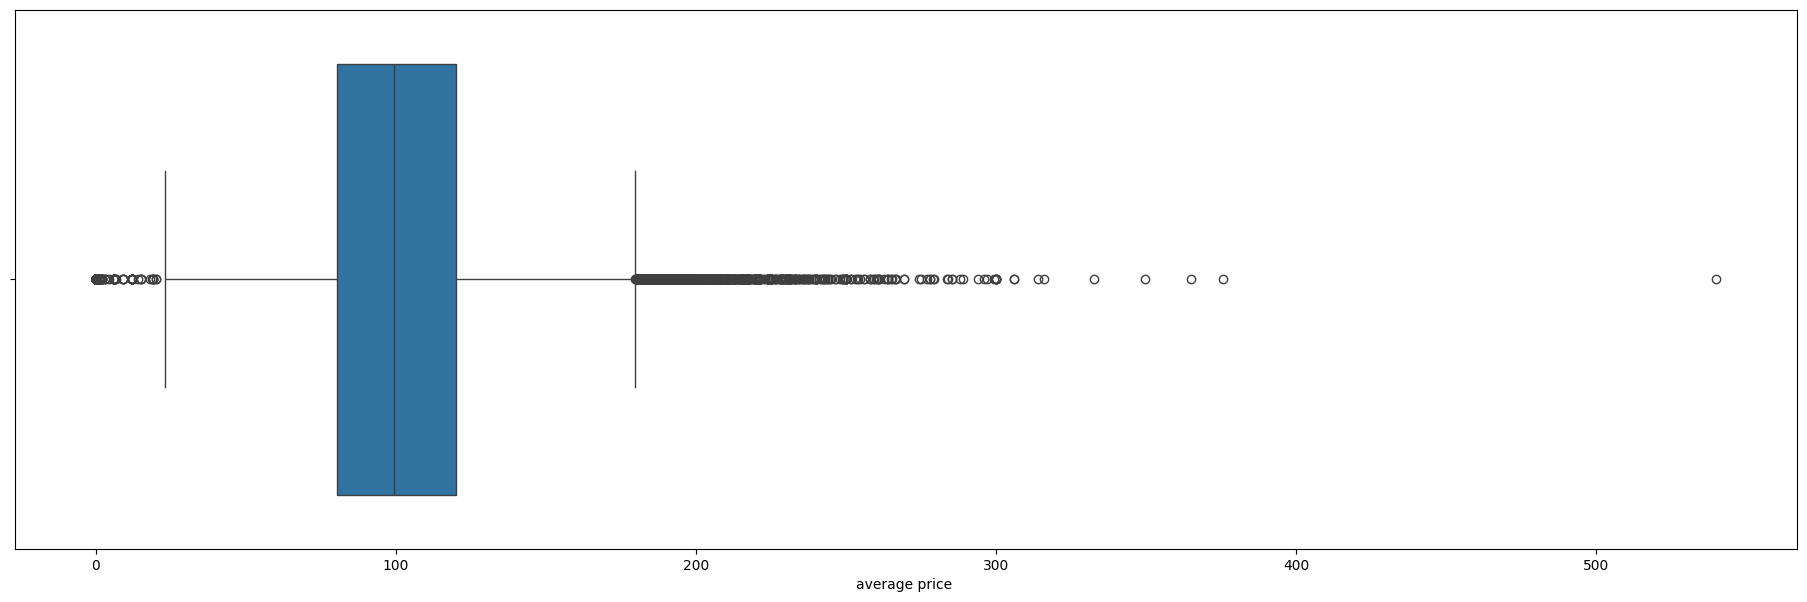

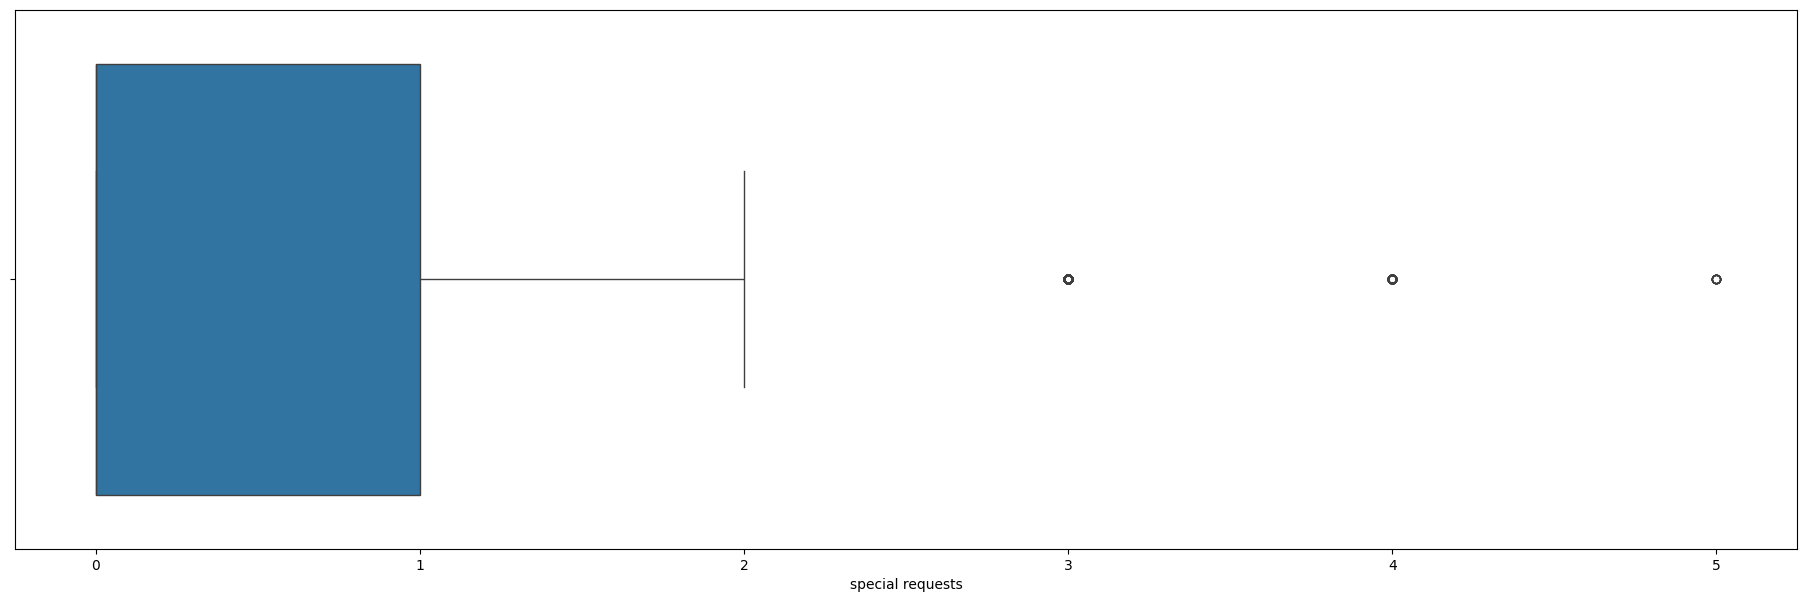

In [31]:
for feature in outlier_features:
    plt.figure(figsize=(23, 7))
    sns.boxplot(x=data[feature])

In [32]:
data['booking status']=data['booking status'].map({'Not_Canceled':0,'Canceled':1})
mapping = {'Room_Type 1':0,'Room_Type 2':1,'Room_Type 3':2,'Room_Type 4':3,'Room_Type 5':4,'Room_Type 6':5,'Room_Type 7':6}
data['room type']=data['room type'].replace(mapping)
mapping1 = {'Not Selected':0,'Meal Plan 1':1,'Meal Plan 2':2,'Meal Plan 3':3}
data['type of meal']=data['type of meal'].replace(mapping1)
data['market segment type']=data['market segment type'].map({'Offline':0,'Online':1})


<ipython-input-32-7a6f1d746512>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['room type']=data['room type'].replace(mapping)
<ipython-input-32-7a6f1d746512>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['type of meal']=data['type of meal'].replace(mapping1)


In [33]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,1,0,0,224,0.0,0,0,0,88.00,0,10/2/2015,0
1,INN00002,1,0,1,3,0,0,0,5,1.0,0,0,0,106.68,1,11/6/2018,0
2,INN00003,2,1,1,3,1,0,0,1,1.0,0,0,0,50.00,0,2/28/2018,1
3,INN00004,1,0,0,2,1,0,0,211,1.0,0,0,0,100.00,1,5/20/2017,1
4,INN00005,1,0,1,2,0,0,0,48,1.0,0,0,0,77.00,0,4/11/2018,1


In [34]:
data = data.drop(['Booking_ID','date of reservation'],axis=1)



In [35]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

In [36]:
x=scaled_df.drop(['booking status','market segment type','special requests'],axis=1)
y=scaled_df['booking status']
x = x.dropna()  # Remove rows with NaN in x
y = y[x.index]  # Update y to match the rows in x after dropping NaN values
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=0)

In [37]:
knn_model=  KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x_train,y_train)

y_pred = knn_model.predict(x_test)

In [38]:
pd.DataFrame({'Y_Test':y_test, 'Y_Pred': y_pred})

,Y_Test,Y_Pred
25951,1.0,1.0
25828,0.0,0.0
36016,0.0,1.0
25304,1.0,0.0
8085,0.0,0.0
...,...,...
21479,1.0,1.0
3673,0.0,0.0
30414,0.0,0.0
5549,1.0,0.0


In [39]:
accuracy_score(y_test,y_pred)

0.8072089947089947

In [40]:
import pickle

# Assuming 'knn_model' is your trained KNeighborsClassifier model
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

print("KNN model saved successfully as knn_model.pkl")

KNN model saved successfully as knn_model.pkl


In [42]:
from flask import Flask, request, jsonify


app = Flask(__name__)

# Load your pre-trained model (assuming it's saved as 'knn_model.pkl')
with open('knn_model.pkl', 'rb') as file:
    knn_model = pickle.load(file)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    features = pd.DataFrame(data, index=[0])

    # Preprocess the data (e.g., scale features, handle missing values)
    # ...

    prediction = knn_model.predict(features)

    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)quit

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
